Olá Matheus!

Meu nome é Ana Paula Araújo. Serei a revisora do seu projeto! Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Matheus, obrigada por enviar seu projeto. Você fez um excelente trabalho!

A maioria das minhas observações foi em tom de sugestão para ajudá-lo em futuras aplicações. Gostei muito do seu código e gostaria de destacar a forma como voce descreveu as etapas, como voce justificou cada decisão tomada. 
    
Quero ressaltar que ao decorrer do projeto percebi que voce usou métodos que ainda não foram totalmente abordados no conteudo da sprint e eles foram muito bem aplicados. Parabens pelo seu esforço e pesquisa.
    
O seu trabalho esta muito bom e você está pronto para a nova sprint! Parabens! 
Boa sorte! :)

# O objetivo desta análise é saber quais dos planos dão mais receita para ajustar o orçamento de publicidade.

- A análise dos planos vai ser baseada em uma pequena seleção de clientes. São dados de 500 clientes da Megaline onde os dados contém:
    - que clientes são
    - de onde eles são
    - qual plano usam
    - quantidade de banda de internet utilizada, o número de chamadas que eles fizeram e mensagens que eles enviaram em 2018.
    

- O trabalho consiste em analisar o comportamento dos clientes e determinar quais planos pré-pagos dão mais receita.

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Bom trabalho!  É sempre bom deixar claro qual o objetivo do projeto! O index ajuda bastante na organização do projeto!
</div>

## Importando os arquivos de dados e estudando as informações gerais

### Importando as bibliotecas

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats as st
import math
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
ml_calls = pd.read_csv("/datasets/megaline_calls.csv")
ml_internet = pd.read_csv("/datasets/megaline_internet.csv")
ml_messages = pd.read_csv("/datasets/megaline_messages.csv")
ml_plans = pd.read_csv("/datasets/megaline_plans.csv")
ml_users = pd.read_csv("/datasets/megaline_users.csv")

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Todos os dados foram carregados corretamente! 
    
</div>

### Explorando os dados iniciais

In [3]:
# Verificando se os dados contém duplicatas
dataframes = [ml_calls, ml_internet, ml_messages, ml_plans, ml_users]
for dataframe in dataframes:
    print(dataframe.duplicated().value_counts())

False    137735
dtype: int64
False    104825
dtype: int64
False    76051
dtype: int64
False    2
dtype: int64
False    500
dtype: int64


<div class="alert alert-block alert-warning">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

É importante verificar se existem duplicatas, icou legal verificar todas em loop for. Sugiro que você escreve a conclusão disso. 
    
</div>

#### Calls

In [4]:
# A tabela calls (dados sobre as chamadas)
ml_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
ml_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
ml_calls["duration"].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [7]:
ml_calls["duration"].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
32.53        1
24.74        1
29.31        1
29.30        1
23.29        1
Name: duration, Length: 2802, dtype: int64

In [8]:
len(ml_calls.query("duration == 0")) / len(ml_calls)

0.1948233927469416

A quantidade de chamadas com duração igual a zero correspode a aproximadamente 19% de todas as chamadas. Por ser um valor consideravel, não irei remover-los da amostra.

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Otimo! Boa exploração inicial da coluna calls
    
</div>

#### Internet

In [9]:
# A tabela internet (dados sobre sessões web):
ml_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [10]:
ml_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
ml_internet["mb_used"].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [12]:
len(ml_internet.query("mb_used == 0")) / len(ml_internet)

0.1311423801574052

A quantidade de sessões com duração uso de banda igual a zero correspode a aproximadamente 13% de todas as utilizações. Por ser um valor consideravel, não irei remover-los da amostra.

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Otimo! Boa exploração inicial da coluna internet
    
</div>

#### Messages

In [13]:
# A tabela messages (dados nas mensagens de texto):
ml_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [14]:
ml_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Otimo! Boa exploração inicial da coluna messages
    
</div>

#### Plans

In [15]:
# A tabela plans(dados sobre os planos)
ml_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
ml_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


#### Users

In [17]:
# A tabela users (dados sobre usuários)
ml_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [18]:
ml_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
ml_users["plan"].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Otimo! Boa exploração inicial das coluna plan e users
    
</div>

In [20]:
# Usuários do ultimate
#ultimate = ml_users.query("plan == 'ultimate'")['user_id']

# Usuários do surf
#surf = ml_users.query("plan == 'surf'")['user_id']

In [21]:
ultimate = []
surf = []

def user_plan(row):
    if row["plan"] == "ultimate":
        ultimate.append(row["user_id"])
    else:
        surf.append(row["user_id"])
        
ml_users.apply(user_plan, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Length: 500, dtype: object

### Conclusões e próximos passos

Conclusões:

ml_calls:
- Transformar "call_date" para datatime.
- "Duration" com muitos valores igual a zero, analisar estes valores. Provavelmente nunca fizeram uma ligação.

ml_internet:
- Transformar "session_date" para datatime.
- Poucos acessos em janeiro e muitos em dezembro.
- "mb_used" analizar valores com zero. Provavelmente nunca utilizaram a internet.

ml_messages:
- Transformar "message_date" para datatime.
- Poucos mensagens em janeiro e muitas em dezembro.

ml_plans:
- Coluna aparentemente ok.

ml_users:
- Transformar "reg_date" e "churn_date" para datatime.
- "churn_date" com valores nulos, significa que o plano continua ativo.

Próximos passos:

Irei analisar se temos dados ausentes, alterar os tipos de dados das colunas que representam data e fazer uma pré-analise dos dados para deixa-los prontos para a EDA.

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Excelente!
    
</div>

## Preparando os dados

### Analisando valores ausentes

A coluna "churn_date" do dataframe "ml_users" tem valores nulos mas estes significam que o plano continua ativo. Não irei alteras estes dados por enquanto, apenas se necessário mais pra frente.

### Alterando os tipos de dados

In [22]:
# Alterando os dados de data para o formato datetime do pandas.
ml_calls["call_date"] = pd.to_datetime(ml_calls["call_date"], format="%Y-%m-%d")
ml_internet["session_date"] = pd.to_datetime(ml_internet["session_date"], format="%Y-%m-%d")
ml_messages["message_date"] = pd.to_datetime(ml_messages["message_date"], format="%Y-%m-%d")
ml_users["reg_date"] = pd.to_datetime(ml_users["reg_date"], format="%Y-%m-%d")
ml_users["churn_date"] = pd.to_datetime(ml_users["churn_date"], format="%Y-%m-%d")

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Muito bom! É importante fazer essa alteração!
    
</div>

In [23]:
# Arredondando a duração das chamadas pra cima, conforme a empresa faz a titulo de cálculo
ml_calls["duration_round"] = ml_calls.apply(lambda x: np.ceil(x["duration"]), axis=1)

<div class="alert alert-block alert-success">
    
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Bom uso do lambda e do np.ceil
    
</div>

In [24]:
ml_calls.head()

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0


### Pré-Análise

Para cada usuário, irei encontrar:
- O número de chamadas feitas e minutos usados por mês.

- O número de mensagens de texto enviadas por mês.

- O volume de dados por mês.

- A receita mensal para cada usuário.

In [25]:
ml_calls["month"] = ml_calls["call_date"].dt.month
ml_internet["month"] = ml_internet["session_date"].dt.month
ml_messages["month"] = ml_messages["message_date"].dt.month

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Otimo!
    
</div>

#### Calls

In [26]:
# Numero de chamadas feitas e minutos usados por mês por usuário.
pivot_calls = ml_calls.pivot_table(index=["user_id", "month"], values="duration_round", aggfunc=["sum", "count"])
pivot_calls.columns = ["duration_round", "Quantity_calls"]
pivot_calls.reset_index(inplace=True)
pivot_calls.head()

,user_id,month,duration_round,Quantity_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


#### Messages

In [27]:
# O número de mensagens de texto enviadas por mês por usuário.
pivot_messages = ml_messages.pivot_table(index=["user_id", "month"], values="id" ,aggfunc="count")
pivot_messages.columns = ["Quantity_msg"]
pivot_messages.reset_index(inplace=True)
pivot_messages.head()

,user_id,month,Quantity_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


#### Internet

In [28]:
# O volume de dados por mês por usuário.
pivot_internet = ml_internet.pivot_table(index=["user_id", "month"], values="mb_used" ,aggfunc="sum")
pivot_internet.reset_index(inplace=True)
pivot_internet.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [29]:
# Arredondando consumo de internet pra cima, conforme a empresa faz a titulo de cálculo
pivot_internet["mb_used_round"] = pivot_internet.apply((lambda x: np.ceil(x["mb_used"] / 1000)), axis=1)

In [30]:
pivot_internet.head()

,user_id,month,mb_used,mb_used_round
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,23.0
4,1001,11,18504.30,19.0


In [31]:
ml_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [32]:
ml_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

As tabelas pivot foram feitas corretamente! 
    
</div>

#### Dataframe merged

In [33]:
# Juntando calls com messages
a = pivot_calls.merge(pivot_messages, on=["user_id", "month"], how="outer")
# Juntando o resultado anterior com internet
b = a.merge(pivot_internet, on=["user_id", "month"], how="outer")
# Filtrando ml_users só com as colunas que irei precisar para o cálculo do consumo médio mensal
c = ml_users[["user_id", "city", "plan"]]
# Juntando o ultimo merge com o ml_users filtrado.
df_merged = c.merge(b, on=["user_id"], how="outer")
df_merged.head()

,user_id,city,plan,month,duration_round,Quantity_calls,Quantity_msg,mb_used,mb_used_round
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12.0,124.0,16.0,11.0,1901.47,2.0
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,182.0,27.0,30.0,6919.15,7.0
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,9.0,315.0,49.0,44.0,13314.82,14.0
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,10.0,393.0,65.0,53.0,22330.49,23.0
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,11.0,426.0,64.0,36.0,18504.30,19.0


<div class="alert alert-block alert-warning">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

Excelente! Sugiro usar um nome mais representativo para as tabelas, ao inves de a, b, c.

    
</div>

In [34]:
# Criando funções para encontrar os custos adicionais de cada serviço.
def calls_cost(row):
    if row["plan"] == 'surf':
        if row["duration_round"] > 500:
            return (row["duration_round"] - 500) * 0.03
        else:
            return 0
    else:
        if row["duration_round"] > 3000:
            return (row["duration_round"] - 3000) * 0.01
        else:
            return 0
        
def messages_cost(row):
    if row["plan"] == 'surf':
        if row["Quantity_msg"] > 50:
            return (row["Quantity_msg"] - 50) * 0.03
        else:
            return 0
    else:
        if row["Quantity_msg"] > 1000:
            return (row["Quantity_msg"] - 1000) * 0.01
        else:
            return 0
        
def internet_cost(row):
    if row["plan"] == 'surf':
        if row["mb_used_round"] > 15:
            return (row["mb_used_round"] - 15) * 10
        else:
            return 0
    else:
        if row["mb_used_round"] > 30:
            return (row["mb_used_round"] - 30) * 7 
        else:
            return 0

<div class="alert alert-block alert-warning">
<b> Comentário geral do revisor </b> <a class="tocSkip"></a>

A função esta ótima. Apenas como sugestão, é melhor utilizar variáveis no lugar desses numeros fixos, pois caso você queira fazer alguma analise ou mudar algum parametro, fica dificil lembrar onde ajustar, mas se tiver uma celula antes, que indique uma variavel para cada custo, fica mais simples!
    
</div>

In [35]:
# Criando colunas para fins de cálculo, month_cost, calls_cost, messages_cost, internet_cost.
df_merged["month_cost"] = df_merged.apply(lambda x: 70 if (x["plan"] == 'ultimate') else 20, axis=1)
df_merged["calls_cost"] = df_merged.apply(calls_cost, axis=1)
df_merged["messages_cost"] = df_merged.apply(messages_cost, axis=1)
df_merged["internet_cost"] = df_merged.apply(internet_cost, axis=1)

In [100]:
df_merged["mensal_cost_total"] = df_merged["month_cost"] + df_merged["calls_cost"] + df_merged["messages_cost"] + df_merged["internet_cost"]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Otimo, apenas a título de curiosidade, você pode somar essas colunas usando método sum(axis=1), dessa forma `df_merged[["month_cost", "calls_cost", "messages_cost", "internet_cost"]].sum(axis=1)`
</div>

In [37]:
# Dataframe com a receita mensal para cada usuário
df_merged.head()

,user_id,city,plan,month,duration_round,Quantity_calls,Quantity_msg,mb_used,mb_used_round,month_cost,calls_cost,messages_cost,internet_cost,mensal_cost_total
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12.0,124.0,16.0,11.0,1901.47,2.0,70,0.0,0.00,0.0,70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,182.0,27.0,30.0,6919.15,7.0,20,0.0,0.00,0.0,20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,9.0,315.0,49.0,44.0,13314.82,14.0,20,0.0,0.00,0.0,20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,10.0,393.0,65.0,53.0,22330.49,23.0,20,0.0,0.09,80.0,100.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,11.0,426.0,64.0,36.0,18504.30,19.0,20,0.0,0.00,40.0,60.00


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
A tabela final esta correta! Bom trabalho!
</div>

In [106]:
# Média mensal
df_merged.query("plan == 'ultimate'")["mensal_cost_total"].mean()

72.6878453038674

In [107]:
df_merged.query("plan == 'surf'")["mensal_cost_total"].mean()

63.445965801139955

## Analisando os dados (EDA)

### Pré

#### Calls

##### Duration

In [260]:
ml_calls["duration"].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [261]:
ml_calls.query("duration > 0")["duration"].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

In [108]:
# Filtrando as chamadas com >0 segundos para fins de análise da distribuição e média.
ml_calls_not_zero = ml_calls.query("duration > 0")

Text(0, 0.5, 'Quantitade de ligações')

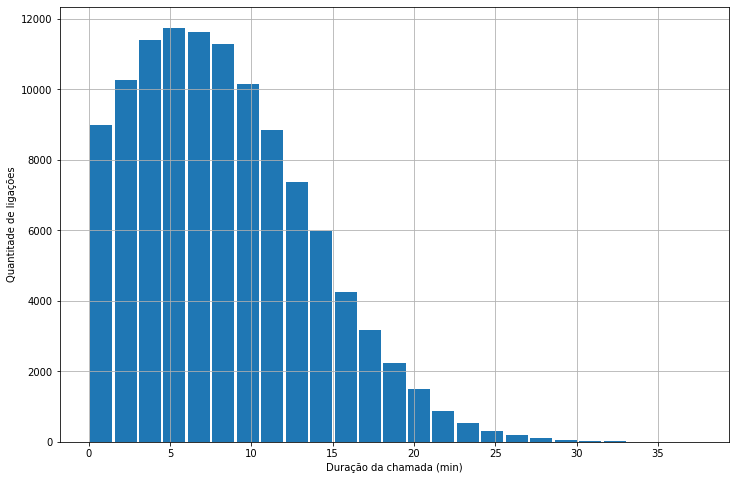

In [109]:
ax = ml_calls_not_zero["duration"].plot(kind="hist", bins=25, figsize=(12,8), grid=True, rwidth=0.9 )
# Set the x-axis label
ax.set_xlabel("Duração da chamada (min)")
# Set the y-axis label
ax.set_ylabel("Quantitade de ligações")

<AxesSubplot:>

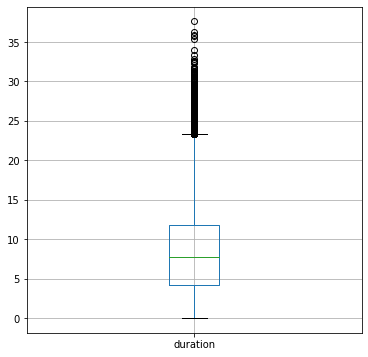

In [110]:
ml_calls_not_zero.boxplot("duration", figsize=(6,6))

In [265]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1_calls_duration = ml_calls_not_zero["duration"].quantile(.25)
Q1_calls_duration
# Limite superior para valores atípicos
Q3_calls_duration = ml_calls_not_zero["duration"].quantile(.75)
Q3_calls_duration
#Limites Outliers
IQR_calls_duration = Q3_calls_duration - Q1_calls_duration
outlier_lower_bound = Q1_calls_duration - 1.5*IQR_calls_duration
outlier_upper_bound = Q3_calls_duration + 1.5*IQR_calls_duration

print(f"Outlier_lower: {outlier_lower_bound}")
print(f"Outlier_upper: {outlier_upper_bound}")

Outlier_lower: -7.354999999999999
Outlier_upper: 23.325


##### Call_date

<AxesSubplot:>

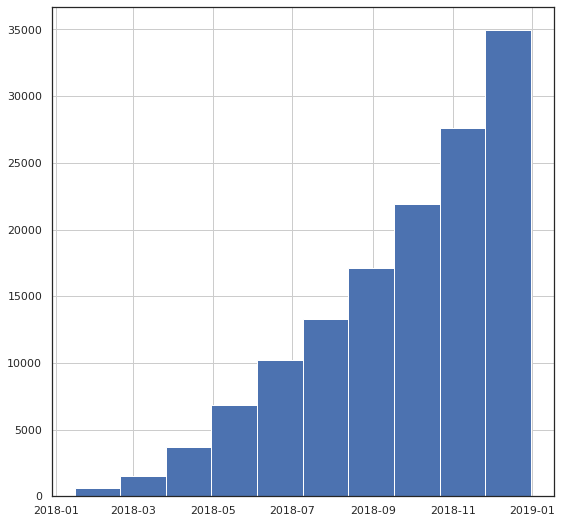

In [266]:
ml_calls["call_date"].hist()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boa analise dos dados de Calls. Fica mais coerente fazer essa analise sem os outliers!
    
</div>

#### Internet

##### Mb_used

In [267]:
ml_internet["mb_used"].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [268]:
ml_internet.query("mb_used > 0")["mb_used"].describe()

count    91078.000000
mean       422.064206
std        255.063501
min          0.010000
25%        223.380000
50%        395.905000
75%        588.367500
max       1693.470000
Name: mb_used, dtype: float64

In [269]:
# Filtrando as utilizações de internet com >0 mb_used para fins de análise da distribuição e média.
ml_internet_mb_not_zero = ml_internet.query("mb_used > 0")

Text(0, 0.5, 'Quantitade')

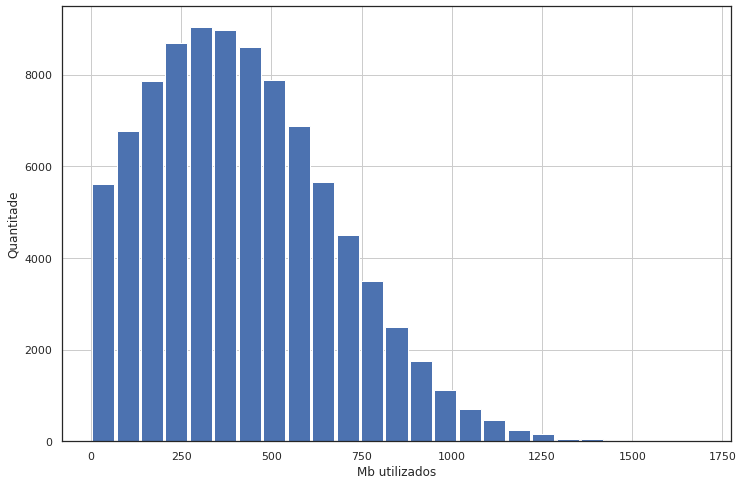

In [270]:
ax = ml_internet_mb_not_zero["mb_used"].plot(kind="hist", bins=25, figsize=(12,8), grid=True, rwidth=0.9 )
# Set the x-axis label
ax.set_xlabel("Mb utilizados")
# Set the y-axis label
ax.set_ylabel("Quantitade")

<AxesSubplot:>

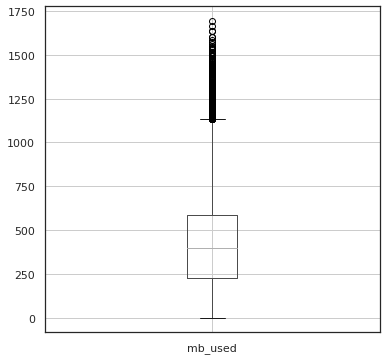

In [271]:
ml_internet_mb_not_zero.boxplot("mb_used", figsize=(6,6))

In [272]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1_mb_used = ml_internet_mb_not_zero["mb_used"].quantile(.25)
Q1_mb_used
# Limite superior para valores atípicos
Q3_mb_used = ml_internet_mb_not_zero["mb_used"].quantile(.75)
Q3_mb_used
#Limites Outliers
IQR_mb_used = Q3_mb_used - Q1_mb_used
outlier_lower_bound = Q1_mb_used - 1.5*IQR_mb_used
outlier_upper_bound = Q3_mb_used + 1.5*IQR_mb_used

print(f"Outlier_lower: {outlier_lower_bound}")
print(f"Outlier_upper: {outlier_upper_bound}")

Outlier_lower: -324.10125000000005
Outlier_upper: 1135.84875


##### Session_date

<AxesSubplot:>

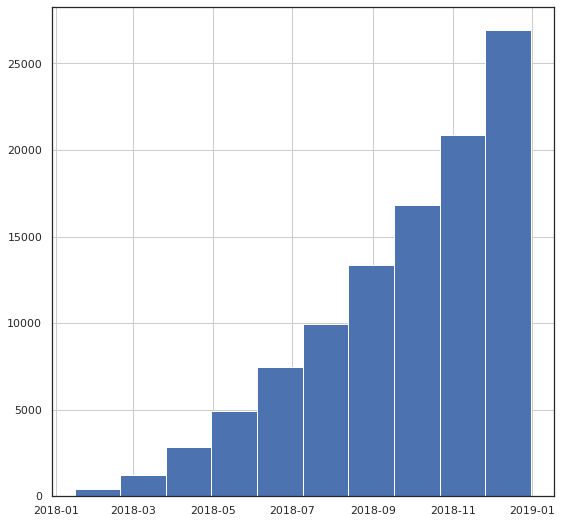

In [273]:
ml_internet["session_date"].hist()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Boa analise dos dados de internet. 
    
</div>

#### Messages

In [142]:
pivot_messages["Quantity_msg"].describe()

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: Quantity_msg, dtype: float64

Text(0, 0.5, 'Quantidade')

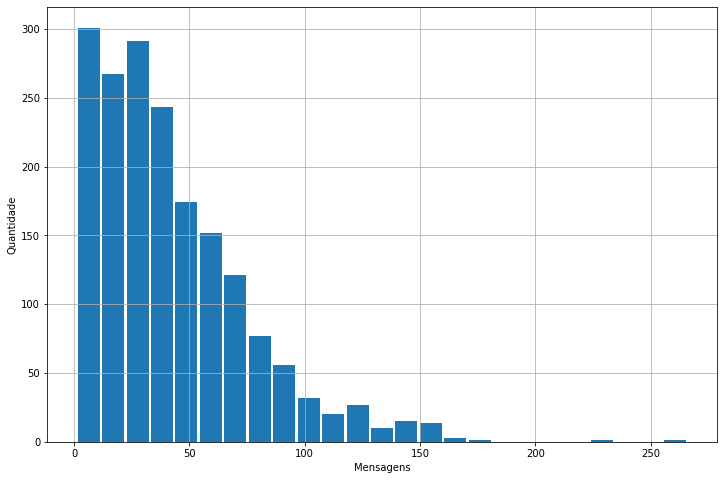

In [150]:
ax = pivot_messages["Quantity_msg"].plot(kind="hist", bins=25, figsize=(12,8), grid=True, rwidth=0.9 )
# Set the x-axis label
ax.set_xlabel("Mensagens")
# Set the y-axis label
ax.set_ylabel("Quantidade")

<AxesSubplot:>

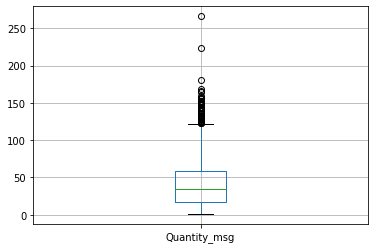

In [151]:
pivot_messages.boxplot("Quantity_msg")

In [149]:
# Cálculando os limites para valores atípicos para filtrar o dataframe posteriormente.
# Limite inferior para valores atípicos
Q1_msg = pivot_messages["Quantity_msg"].quantile(.25)
Q1_msg
# Limite superior para valores atípicos
Q3_msg = pivot_messages["Quantity_msg"].quantile(.75)
Q3_msg
#Limites Outliers
IQR_msg = Q3_msg - Q1_msg
outlier_lower_bound = Q1_msg - 1.5*IQR_msg
outlier_upper_bound = Q3_msg + 1.5*IQR_msg

print(f"Outlier_lower: {outlier_lower_bound}")
print(f"Outlier_upper: {outlier_upper_bound}")

Outlier_lower: -46.0
Outlier_upper: 122.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Otimo!
    
    
</div>

### Pós

In [152]:
# Criando um novo dataframe sem os valores atipicos para cada uma das 3 variavéis.
#Calls
ml_calls_final = ml_calls.query("duration > 0 and duration < 23.325")
#Internet
ml_internet_final = ml_internet.query("mb_used > 0 and mb_used < 1135.84875 ")
#Messages
x = pivot_messages
ml_messages_final = pivot_messages.query("Quantity_msg < 556.875")

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Também é interessante armazenar esses limites inf e sup em variáveis.
    
</div>

In [155]:
ml_messages_final

,user_id,month,Quantity_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [196]:
def calls_plans(row):
    if row["user_id"] in ultimate:
        return "ultimate"
    else:
        return "surf"
ml_calls_final["user_plan"] = ml_calls_final.apply(calls_plans, axis=1)
ml_calls["user_plan"] = ml_calls.apply(calls_plans, axis=1)

#### Calls

In [198]:
# Distribuição sem valores atípicos.
ml_calls_final["duration"].describe()

count    109993.000000
mean          8.235398
std           5.136157
min           0.010000
25%           4.120000
50%           7.650000
75%          11.700000
max          23.320000
Name: duration, dtype: float64

In [251]:
##### NÂO CONSEGUI LEGENDAR O PLOT

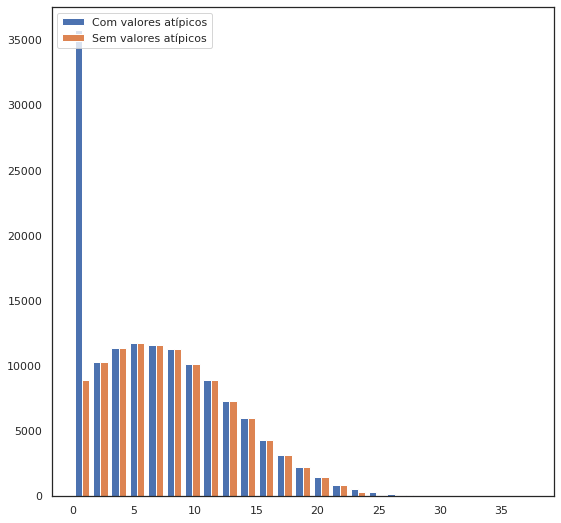

In [253]:
# Comparando a distribuição com e sem os valores atípicos.
a = ml_calls["duration"]
b = ml_calls_final["duration"]

plt.hist([a, b], label=['Com valores atípicos', 'Sem valores atípicos'], bins=25)
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

É interessante colocar labels e titulo, tanto nesse gráfico quanto nos outros. 
    
    
</div>

In [200]:
ml_calls['dataset'] = 'Com outliers'
ml_calls_final['dataset'] = 'Sem Outliers'
data=pd.concat([ml_calls, ml_calls_final])
#data = data.astype({"duration": float})

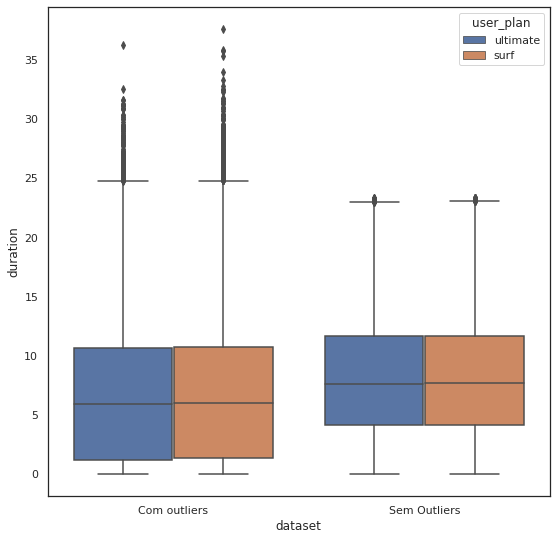

In [201]:
sns.boxplot(data=data, x="dataset", y='duration', hue="user_plan")
sns.set(rc={'figure.figsize':(9,9)})
sns.set_style('white')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Otimo!
    
    
</div>

In [202]:
# Variância
ml_calls_final["duration"].var()

26.380104216773855

In [203]:
# Desvio padrão
ml_calls_final["duration"].std()

5.136156560773226

In [204]:
# Duração média de chamadas de usuários do plano ultimate
ml_calls_final.query("user_plan == 'ultimate'").mean()["duration"]

8.202582493521449

In [205]:
# Duração média de chamadas de usuários do plano surf
ml_calls_final.query("user_plan == 'surf'").mean()["duration"]

8.25054050463043

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
    
</div>

#### Internet

In [206]:
# Distribuição sem valores atípicos.
ml_internet_final["mb_used"].describe()

count    90426.000000
mean       416.170129
std        246.175446
min          0.010000
25%        221.972500
50%        393.395000
75%        583.177500
max       1135.570000
Name: mb_used, dtype: float64

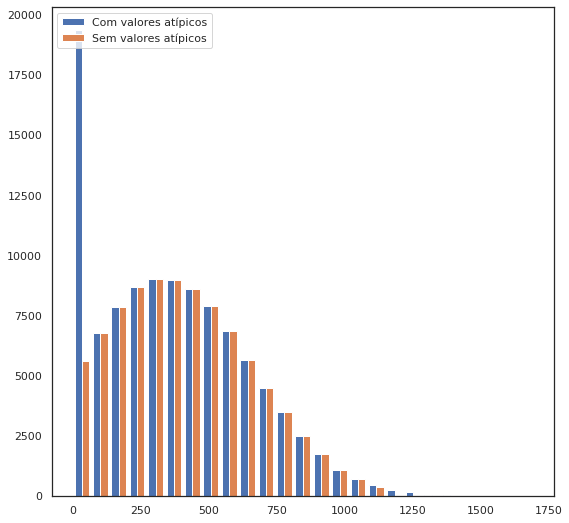

In [208]:
# Comparando a distribuição com e sem os valores atípicos.
a = ml_internet["mb_used"]
b = ml_internet_final["mb_used"]

plt.hist([a, b], label=['Com valores atípicos', 'Sem valores atípicos'], bins=25)
plt.legend(loc='upper left')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ficou bem interessante a comparação!
    
</div>

In [209]:
ml_internet_final["user_plan"] = ml_internet_final.apply(calls_plans, axis=1)
ml_internet["user_plan"] = ml_internet.apply(calls_plans, axis=1)

In [210]:
ml_internet['dataset'] = 'Com outliers'
ml_internet_final['dataset'] = 'Sem Outliers'
data1=pd.concat([ml_internet, ml_internet_final])

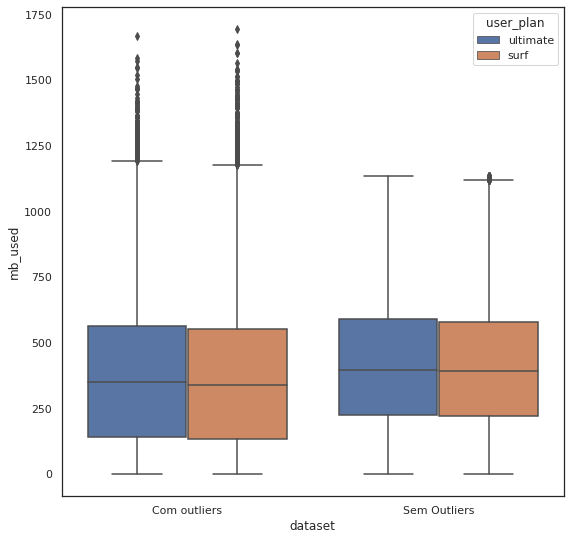

In [213]:
sns.boxplot(data=data1, x="dataset", y='mb_used', hue="user_plan")
sns.set(rc={'figure.figsize':(9,9)})
sns.set_style('white')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

No boxplot fica bem claro a diferença.
    
</div>

In [214]:
# Variância
ml_internet_final["mb_used"].var()

60602.35030630692

In [215]:
# Desvio padrão
ml_internet_final["mb_used"].std()

246.17544618890594

In [216]:
# Média de banda utilizada por usuários do plano ultimate
ml_internet_final.query("user_plan == 'ultimate'").mean()["mb_used"]

420.89670930515484

In [217]:
# Média de banda utilizada por usuários do plano surf
ml_internet_final.query("user_plan == 'surf'").mean()["mb_used"]

413.96471803688155

#### Messages

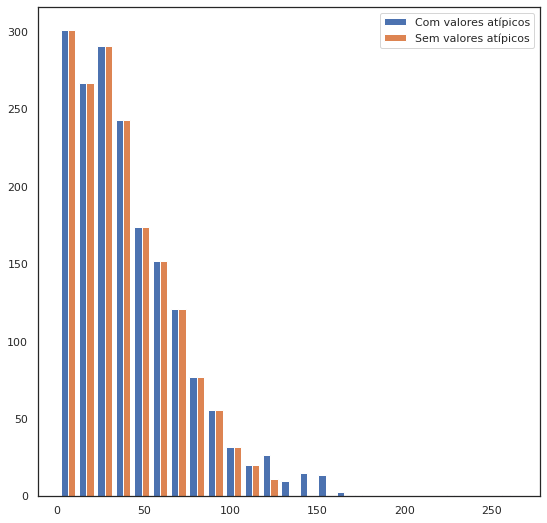

In [250]:
# Comparando a distribuição com e sem os valores atípicos.
a = pivot_messages["Quantity_msg"]
b = ml_messages_final["Quantity_msg"]

plt.hist([a, b], label=['Com valores atípicos', 'Sem valores atípicos'], bins=25)

plt.legend(loc='upper right')
plt.show()

In [229]:
pivot_messages["user_plan"] = ml_messages.apply(calls_plans, axis=1)
ml_messages_final["user_plan"] = ml_messages_final.apply(calls_plans, axis=1)

In [230]:
pivot_messages['dataset'] = 'Com outliers'
ml_messages_final['dataset'] = 'Sem Outliers'
data3=pd.concat([ml_messages1, ml_messages_final])

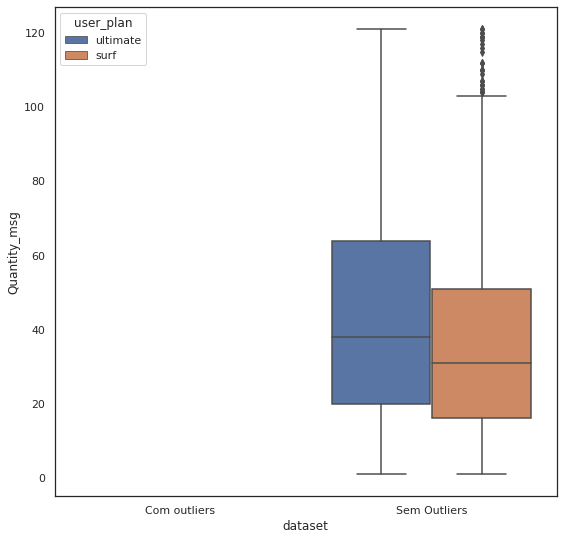

In [237]:
sns.boxplot(data=data3, x="dataset", y='Quantity_msg', hue="user_plan")
sns.set(rc={'figure.figsize':(9,9)})
sns.set_style('white')

In [232]:
# Variância
ml_messages_final["Quantity_msg"].var()

736.6450126179649

In [233]:
# Desvio padrão
ml_messages_final["Quantity_msg"].std()

27.1412050693768

In [234]:
# Quantidade média mensal de mensagens enviadas de usuários do plano ultimate
ml_messages_final.query("user_plan == 'ultimate'").mean()["Quantity_msg"]

42.827708703374775

In [235]:
# Quantidade média mensal de mensagens enviadas  de usuários do plano surf
ml_messages_final.query("user_plan == 'surf'").mean()["Quantity_msg"]

36.47969543147208

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabens Matheus, você mostrou dominio. Essa etapa de EDA ficou muito boa!
    
</div>

## Testando hipóteses

###  A receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [258]:
df_merged.head()

,user_id,city,plan,month,duration_round,Quantity_calls,Quantity_msg,mb_used,mb_used_round,month_cost,calls_cost,messages_cost,internet_cost,mensal_cost_total
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,12.0,124.0,16.0,11.0,1901.47,2.0,70,0.0,0.00,0.0,70.00
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,8.0,182.0,27.0,30.0,6919.15,7.0,20,0.0,0.00,0.0,20.00
2,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,9.0,315.0,49.0,44.0,13314.82,14.0,20,0.0,0.00,0.0,20.00
3,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,10.0,393.0,65.0,53.0,22330.49,23.0,20,0.0,0.09,80.0,100.09
4,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,11.0,426.0,64.0,36.0,18504.30,19.0,20,0.0,0.00,40.0,60.00


In [516]:
# Hipótese sobre a Igualdade das Médias de Duas Populações

In [475]:
# H0 - A receita média dos usuários dos planos Ultimate e Surf são iguais

In [259]:
ultimate_sample = df_merged.query("plan == 'ultimate'")["mensal_cost_total"]
surf_sample = df_merged.query("plan == 'surf'")["mensal_cost_total"]

In [260]:
alpha = 0.05  # significância estatística crítica

results = st.ttest_ind(ultimate_sample, surf_sample, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Nós não podemos rejeitar a hipótese nula") 

p-value:  1.3814968413089385e-09
Rejeitamos a hipótese nula


Concluímos que os dados fornecem evidência de que a receita média dos usuários do planos ultimate e surf são diferentes.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O teste de hipotese esta correto! É interessante justificar o uso do equal_var=False
    
</div>

### H0 - A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões.

In [255]:
# H0 - A receita média dos usuários da área de NY-NJ é igual a de outras regiões.

In [261]:
ny_nj = df_merged.query("city == 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["mensal_cost_total"]
others = df_merged.query("city != 'New York-Newark-Jersey City, NY-NJ-PA MSA'")["mensal_cost_total"]

In [262]:
alpha = 0.05  # significância estatística crítica

results = st.ttest_ind(ny_nj, others, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print("Não podemos rejeitar a hipótese nula") 

p-value:  0.0946991823182318
Não podemos rejeitar a hipótese nula


O valor-p nos diz que, embora os valores médios para as duas áreas sejam diferentes, há uma probabilidade de 9,5% de obter aleatoriamente uma diferença desse tamanho ou maior. Esta probabilidade é claramente muito alta para concluir que há uma diferença significativa entre a receita médias destes usuários.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente!
    
</div>

In [288]:
df_merged.query("plan == 'ultimate'")["mb_used"]

0        1901.47
19       2068.37
20      32118.82
26      17106.99
27      23676.72
          ...   
2268    14991.17
2269    16329.57
2270    15630.78
2271    15289.09
2287    11106.55
Name: mb_used, Length: 724, dtype: float64

## Conclusão Geral

In [305]:
# Receita mensal surf > ultimate

In [304]:
df_merged.pivot_table(index=["plan"], values=["mb_used", "Quantity_calls", "Quantity_msg", "duration_round", "mensal_cost_total"])

,Quantity_calls,Quantity_msg,duration_round,mb_used,mensal_cost_total
plan,,,,,
surf,60.895793,40.109656,436.519741,16717.702137,63.445966
ultimate,61.221599,46.296233,434.676017,17238.642253,72.687845


In [303]:
df_merged.pivot_table(index=["plan", "month"], values="mb_used_round")

mb_used_round
plan     month               
surf     1.0         5.000000
         2.0        12.666667
         3.0        13.782609
         4.0        12.673469
         5.0        14.644737
         6.0        16.094737
         7.0        17.441667
         8.0        17.578616
         9.0        17.160622
         10.0       18.000000
         11.0       16.957295
         12.0       18.671924
ultimate 1.0         7.250000
         2.0        17.571429
         3.0        18.833333
         4.0        16.476190
         5.0        17.068966
         6.0        15.829787
         7.0        16.813559
         8.0        18.380282
         9.0        17.534884
         10.0       18.257143
         11.0       17.543307
         12.0       18.841060

Em relação a receita média mensal de cada plano, embora o plano surf seja mais barato 20 dólares e sua receita média mensal seja menor que a do plano ultimate, o plano que gera mais receita é o plano surf, a receita anual do plano surf foi de aproximamente 100000 dólares, enquanto do plano ultimate foi de aproximadamente 53000 dólares, quase o dobro em relação ao outro.

Provavelmente isso acontece pois a quantidade de usuários do plano surf é ligeiramente maior que o dobro dos usuários do plano ultimate e mesmo o surf sendo 50 dólares mais barato, o gasto médio de seus usuários é de 63 dólares, isso significa que grande parte dos usuários surf excedem os limites do pacote e gastam bastante com adicionais.

Como podemos observar na tabela anterior, o uso médio mensal de dados por usuários do plano surf é maior que 15GB em praticamente todos os meses, sendo este excedente o principal incremento na mensalidade do plano.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Parabéns! A conclusão foi clara e resumiu bem as etapas realizadas no projeto! Seu projeto esta excelente!
    
</div>